# Read and plot the interpolated model values along the satellite track as a check

* The space-time interpolation was made previously (see notebook 'interpolation'.

*  Each file is 6-month long. 
* In  each file you’ll find:
        - sossheig (Sea Surface Height interpolated at all alongtrack locations)
        - sla_unfiltered (the real obs value (SLA))
        - mdt (the mdt from the real obs file)

# Imports

In [1]:
import sys
from os import getenv
import warnings
import pkg_resources
import numpy as nmp
import datetime
# xarray
import xarray as xr
# pandas
import pandas as pd

# custom tools for plotting purposes
import libslx as slx


# cartopy
import cartopy
import cartopy.crs as ccrs

# matplotlib
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.colors as colors

%matplotlib inline

In [2]:
# list packages version for the record
root_packages = ['cartopy','pandas','argparse','numpy', 'netCDF4', 'time','datetime','calendar','shapely','matplotlib']

# print versions, but check if package is imported first
for m in pkg_resources.working_set:
    if m.project_name.lower() in root_packages:
        print(f"{m.project_name}=={m.version}") 

Shapely==1.7.1
pandas==1.2.1
numpy==1.20.0
matplotlib==3.3.4
Cartopy==0.18.0


# Initializations

In [3]:
# ------------------------------------ (SATELLITE)
# satellite directory
GONZAG_DATA_DIR = '/gpfsstore/rech/egi/regi915/EUROSEA/SAT/JASON3'

# Satellite input data:
name_sat = 'jason3'

# 6-month segment to consider in sat data and model data
# year
YR=2021

seg=2 # Seg1: july to dec. 
#seg=2 # Seg2: jan to june

if seg==1:
    da=str(YR)+'07-'+str(YR+1)+'01'
    damod=str(YR)+"m07-12"
if seg==2:
    da=str(YR)+'01-'+str(YR)+'07'
    damod=str(YR)+"m01-06"

# file name
file_sat = GONZAG_DATA_DIR+'/JASON3_'+da+'.nc'
# variable to read
name_ssh_sat = 'sla_unfiltered'


# ------------------------------------  (MODEL)
# model gridded data directory
GONZAG_MOD_DIR = '/gpfsstore/rech/egi/regi915/EUROSEA/MOD'

# Model input data:
name_mod = 'eNATL60-WestMed'
file_mod = GONZAG_MOD_DIR+"/eNATL60MEDWEST-BLB002_y"+damod+".1h_sossheig_corrnc.nc4.02"
                                   
# variable to read: SSH
name_ssh_mod = 'sossheig'
file_lsm_mod = file_mod; 

# ------------------------------------ (INTERPOLATED DATA)
# output directory for the interpolation result
diri = '/gpfsstore/rech/egi/regi915/EUROSEA/NRT_INTERP/'

#name of output file
nami='interpres_'+name_sat+'_'+da


# ------------------------------------ (OUTPUT)
# output directory for the plots
diro = diri+'/PLT/'


# Read model gridded data with xarray

In [4]:
# model gridded data
modat = xr.open_dataset(file_mod)[name_ssh_mod]

# model land-sea mask
ma = xr.open_dataset(GONZAG_MOD_DIR+'/maskMED.nc')['fmask'][0,0,:,:].squeeze()

# latitude of the model grid
glamt = xr.open_dataset(file_mod)['glamt']
# longitude of the model grid
gphit = xr.open_dataset(file_mod)['gphit']
modat

<xarray.DataArray 'sossheig' (time_counter: 4344, y: 803, x: 883)>
[3080108856 values with dtype=float32]
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 2021-01-01T00:30:00 ... 2021-...
Dimensions without coordinates: y, x
Attributes:
    standard_name:       sea_surface_height_above_geoid
    long_name:           sea surface height
    units:               m
    coordinates:         nav_lat nav_lon
    online_operation:    average
    interval_operation:  40 s
    interval_write:      1 h
    cell_methods:        time: mean (interval: 40 s)

# Read interpolated files with xarray 

In [5]:
xre = xr.open_dataset(diri+nami+'.nc')
xre

<xarray.Dataset>
Dimensions:         (time: 18057)
Coordinates:
  * time            (time) datetime64[ns] 2021-01-01T16:13:53.653385984 ... 2...
Data variables:
    latitude        (time) float32 ...
    longitude       (time) float32 ...
    sossheig_np     (time) float32 ...
    sossheig_bl     (time) float32 ...
    sla_unfiltered  (time) float32 ...
    distance        (time) float32 ...
    mdt             (time) float32 ...
Attributes:
    about:    Created with Gonzag package => https://github.com/brodeau/gonzag

<xarray.DataArray 'mdt' ()>
array(-32767., dtype=float32)

# Plot map and tracks (as a check)

(plot mean SSH over `delta` days and circles for satellite obs locations. The shading of the alongtrack points is the model SSH interpolated.)

* start dates every `delta` days

In [109]:
if seg==1:
    dastart=str(YR)+'-07-01'
if seg==2:
    dastart=str(YR)+'-01-01'

# nb of days over which to look at:
delta=1

# nb of time segments to look at:
nseg=3

timestr = pd.date_range(dastart, freq=str(delta)+"D", periods=nseg)
timestrstr = pd.Series(timestr.format())    
timestrstr

0    2021-01-01
1    2021-01-02
2    2021-01-03
dtype: object

### now plot

/gpfslocalsup/pub/anaconda-py3/2020.11/envs/climate_science/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1597: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


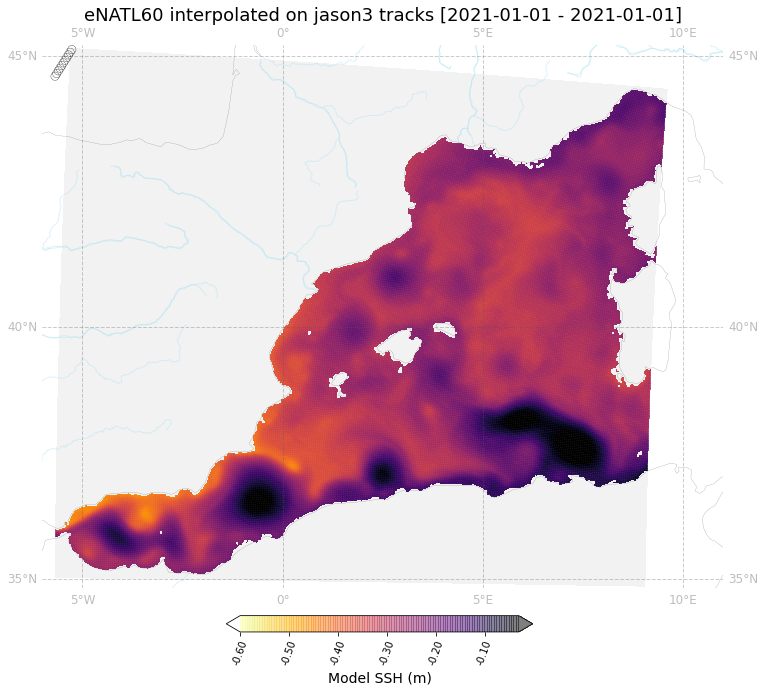

/gpfslocalsup/pub/anaconda-py3/2020.11/envs/climate_science/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1597: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


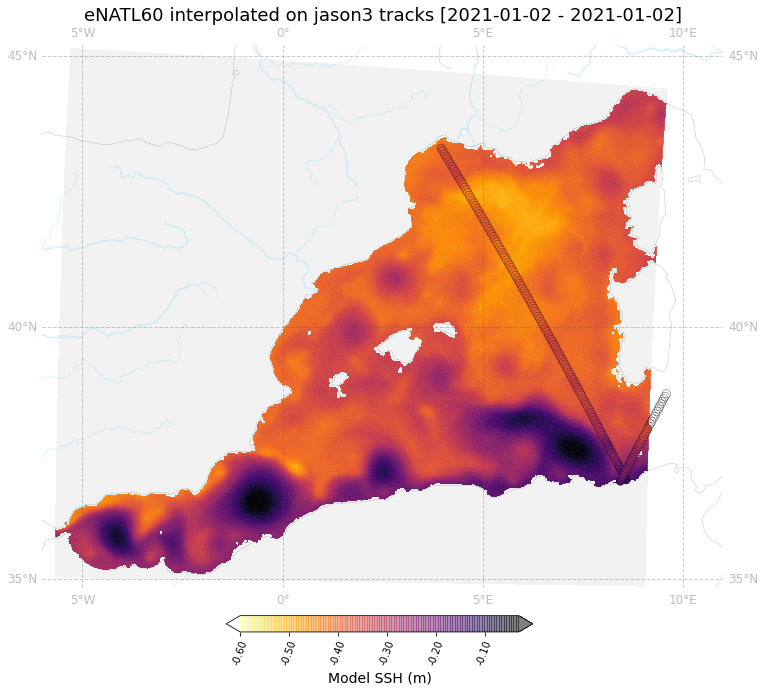

/gpfslocalsup/pub/anaconda-py3/2020.11/envs/climate_science/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1597: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


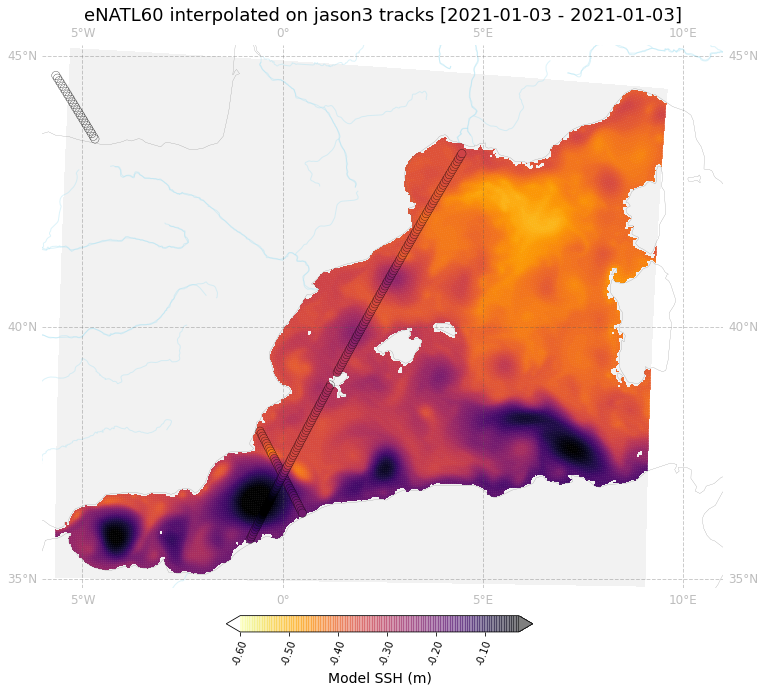

In [111]:
# SELECT delta DAYS and compute  average of gridded model data

# initialize counter
it=(delta*1000)-1

# for each start date:
for start in timestrstr:
    it = it+1
    
    # select delta consecutive days following start day
    timeselect = pd.date_range(start, freq="1D", periods=delta)
    timeselectstr = pd.Series(timeselect.format())
    
    # select model data over those delta days
    select1day_mod    = modat.sel(time_counter=slice(timeselectstr[0],timeselectstr[timeselectstr.size-1]))
    select1day_mod_ave = select1day_mod.mean(dim='time_counter')

    # select same time periode of delta days in along-track interpolated data:
    select1day_track  = xre.sel(time=slice(timeselectstr[0],timeselectstr[timeselectstr.size-1]))

    # REGION TO PLOT
    reg='MED'


    # PLOT NAME
    namoplt = nami+"_"+str(delta)+"_"+str(it)

    #========= DATA TO PLOT

    # main variable
    data2plot  = select1day_mod_ave.squeeze()



    # lat lon
    lon2plot = glamt.squeeze()
    lat2plot = gphit.squeeze()

    # land mask from model
    m2plt      = ma.where(ma==0)



    #========= Plot settings ===============
    levbounds=[-0.6,-0.025,0.005]

    # COLORMAP
    co='in' # 
    #add indication of colormap to the plot name:
    namoplt = co+namoplt

    # rgb color for model land grid points
    r=242;g=242;b=242


    # color for continents from data based (hi-res)
    #onecohrml='#2E2E2E'
    onecohrml='none'



    # customed colormapls
    if (co=='in'):
        cmap,norm = slx.mycolormap(levbounds,cm_base='inferno_r',cu='w',co='k')

    # set grid params for future fig
    gridl,incrgridlon,incrgridlat,sath,minlat,maxlat,minlon,maxlon,loncentr,latcentr = slx.pltgridparam(reg=reg,gridl=False)


    #================================================================
    #========= CREATE FIGURE
    fig3 = plt.figure(figsize=([18,10]),facecolor='white')

    #========= PLOT DATA
    # Data system proj (if coords are in lat lon, use PlateCarre here)
    trdata  = ccrs.PlateCarree() 
    if ((reg=='GLO')|((reg=='MED'))):
        ax = plt.axes(projection= ccrs.Mercator(central_longitude=loncentr,min_latitude=minlat, max_latitude=maxlat, globe=None))
    else:
        ax = plt.axes(projection= ccrs.NearsidePerspective(central_longitude=loncentr, central_latitude=latcentr,satellite_height=sath))
    # plot data
    cs  = plt.pcolormesh(lon2plot, lat2plot, data2plot,shading='flat',cmap=cmap,transform=trdata,norm=norm,alpha=0.5)

    # plot grey shading  where ocean mask is 0 (land gridpoints in the model)
    # rgb color for model land grid points
    cs2  = plt.pcolormesh(lon2plot, lat2plot, m2plt, shading='flat',cmap=slx.make_SLXcolormap(reverse=False,whichco='oneco',r=r,g=g,b=b),transform=trdata)


    #========= GEOGRAPHICAL FEATURES
    # make plot nice with rivers, continents, grids:
    ax,gl = slx.pltaddfeatures(ax,5,5,onecohrml='none',reg=reg,landedgeco='#6E6E6E')  ##585858#BDBDBD

    # cirlces for sat tracks
    s1=plt.scatter(x=select1day_track.longitude.values,
        y=select1day_track.latitude.values,
        c=select1day_track.sossheig_np.values,
        alpha=1,
        s=70,
        linewidths=0.3,
        marker='o',
        edgecolors='k',
        transform=trdata,
        cmap=cmap,
        norm=norm,
        zorder=20) 

    plt.title("eNATL60 interpolated on "+name_sat+" tracks ["+timeselectstr[0]+" - "+timeselectstr[timeselectstr.size-1]+"]",color='k',size=18)

    ax.set_extent([-6, 11, 34.8, 45.2])

    #========= ADD COLORBAR
    cbon=True
    if cbon:
            tlabel="Model SSH (m)"
            cb = slx.addcolorbar(fig3,cs,ax,levbounds,levincr=20,tformat="%.2f",
                                 tlabel=tlabel,facmul=1,orientation='horizontal',tc='k',
                                bbta=(-0.18,-0.25,0.9,0.2))  




    #========= PLT SHOW AND SAVE
    plt.show()

    # Save fig in png, resolution dpi    
    slx.saveplt(fig3,diro+"/mov/",namoplt,dpifig=300)
    plt.close(fig3)
